In [1]:
#building a machine learning model for predicting Paris housing
#dataset..kaggle.com

In [2]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#loading the dataset
df=pd.read_csv('C://Users/sojore/Documents/paris housing classification/ParisHousingClass.csv')
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [4]:
#exploring the dataset
df.shape

(10000, 18)

In [5]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [6]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category'],
      dtype='object')

In [7]:
df.hasStormProtector.unique()

array([1, 0], dtype=int64)

In [8]:
df.groupby('category')['category'].agg('count')

category
Basic     8735
Luxury    1265
Name: category, dtype: int64

In [9]:
#droping unneccesary columns
df1=df.drop(['cityCode','made','cityPartRange'],axis='columns')
df1.shape

(10000, 15)

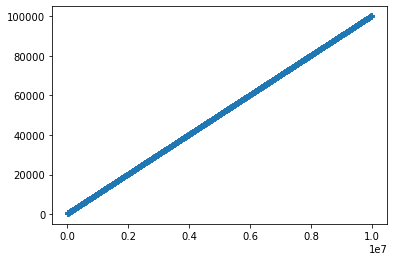

In [10]:
plt.scatter(df1.price,df1.squareMeters,marker='+')

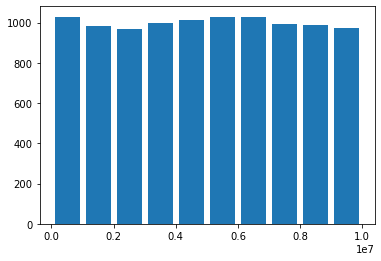

In [11]:
plt.hist(df1.price,rwidth=0.8)
plt.show()

In [12]:
#detecting and filtering outliers

In [13]:
df1.head(1)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,numPrevOwners,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,8,0,1,4313,9005,956,0,7,7559081.5,Basic


In [14]:

df1['squareMeters2']=df1['squareMeters']**2
df1['numberOfRooms2']=df1['numberOfRooms']**2
df1['floors2']=df1['floors']**2
df1['numPrevOwners2']=df1['numPrevOwners']**2
df1['basement2']=df1['basement']**2
df1['attic2']=df1['attic']**2
df1['garage2']=df1['garage']**2
df1['hasGuestRoom2']=df1['hasGuestRoom']**2
df1.head(2)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,numPrevOwners,isNewBuilt,hasStormProtector,basement,attic,...,price,category,squareMeters2,numberOfRooms2,floors2,numPrevOwners2,basement2,attic2,garage2,hasGuestRoom2
0,75523,3,0,1,63,8,0,1,4313,9005,...,7559081.5,Basic,5703723529,9,3969,64,18601969,81090025,913936,49
1,80771,39,1,1,98,6,1,0,3653,2436,...,8085989.5,Luxury,6523954441,1521,9604,36,13344409,5934096,16384,4


In [15]:
#using quantile function to filter outliers
ll1=df1.squareMeters2.quantile(0.01)
ul1=df1.squareMeters2.quantile(0.99)
df1[(df1.squareMeters2<=ll1) | (df1.squareMeters2>=ul1)]
df2=df1[(df1.squareMeters2>ll1) & (df1.squareMeters2<ul1)]
df2.shape

(9800, 23)

In [16]:
ll2=df2.numberOfRooms2.quantile(0.01)
ul2=df2.numberOfRooms2.quantile(0.99)
df2[(df2.numberOfRooms2<=ll2) | (df2.numberOfRooms2>=ul2)]
df3=df2[(df2.numberOfRooms2>=ll2) & (df2.numberOfRooms2<=ul2)]
df3.shape

(9714, 23)

In [17]:
ll3=df3.floors2.quantile(0.01)
ul3=df3.floors2.quantile(0.99)
df3[(df3.floors2<=ll3) | (df3.floors2>=ul3)]
df4=df3[(df3.floors2>=ll3) & (df3.floors2<=ul3)]
df4.shape

(9550, 23)

In [18]:
ll4=df4.numPrevOwners2.quantile(0.001)
ul4=df4.numPrevOwners2.quantile(0.999)
df4[(df4.numPrevOwners2<=ll4) | (df4.numPrevOwners2>=ul4)]
df5=df4[(df4.numPrevOwners2>ll4) & (df4.numPrevOwners2<ul4)]
df5.shape

(7687, 23)

In [19]:
ll5=df5.basement2.quantile(0.01)
ul5=df5.basement2.quantile(0.99)
df5[(df5.basement2<=ll5) | (df5.basement2>=ul5)]
df6=df5[(df5.basement2>ll5) & (df5.basement2<ul5)]
df6.shape

(7532, 23)

In [20]:
ll6=df6.attic2.quantile(0.01)
ul6=df6.attic2.quantile(0.99)
df6[(df6.attic2<ll6) | (df6.attic2>ul6)]
df7=df6[(df6.attic2>ll6) & (df6.attic2<ul6)]
df7.shape

(7379, 23)

In [21]:
ll7=df7.garage2.quantile(0.01)
ul7=df7.garage2.quantile(0.99)
df7[(df7.garage2<=ll7) | (df7.garage2>=ul7)]
df8=df7[(df7.garage2>=ll7) & (df7.garage2<=ul7)]
df8.shape

(7240, 23)

In [22]:
ll8=df8.hasGuestRoom2.quantile(0.01)
ul8=df8.hasGuestRoom2.quantile(0.99)
df8[(df8.hasGuestRoom2<=ll8) | (df8.hasGuestRoom2>=ul8)]
df9=df8[(df8.hasGuestRoom2>ll8) & (df8.hasGuestRoom2<ul8)]
df9.shape

(5907, 23)

In [23]:
df9.head(2)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,numPrevOwners,isNewBuilt,hasStormProtector,basement,attic,...,price,category,squareMeters2,numberOfRooms2,floors2,numPrevOwners2,basement2,attic2,garage2,hasGuestRoom2
0,75523,3,0,1,63,8,0,1,4313,9005,...,7559081.5,Basic,5703723529,9,3969,64,18601969,81090025,913936,49
1,80771,39,1,1,98,6,1,0,3653,2436,...,8085989.5,Luxury,6523954441,1521,9604,36,13344409,5934096,16384,4


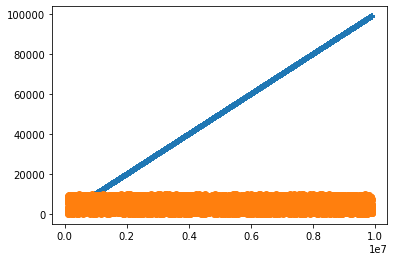

In [24]:
plt.scatter(df9.price,df9.squareMeters,marker='+')
# plt.scatter(df1.price,df1.attic)
plt.scatter(df9.price,df9.basement)

In [25]:
#dropping some more unneccesary columns
df10=df9.drop(['squareMeters2','numberOfRooms2','floors2','numPrevOwners2','basement2','attic2','garage2','hasGuestRoom2'],
              axis=1)
df10.sample(4)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,numPrevOwners,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
2548,12508,52,1,0,53,7,1,1,3399,6594,431,0,4,1258036.1,Basic
9290,82643,84,0,1,77,2,1,0,663,3740,496,1,5,8274608.3,Basic
3710,62785,11,1,0,40,6,0,1,9060,1510,636,1,5,6281861.1,Basic
4890,91395,66,0,0,71,9,0,1,3714,1724,223,1,2,9145192.7,Basic


In [26]:
df10['price_per_sqmt']=df10.price/df10.squareMeters
df10.head(2)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,numPrevOwners,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,price_per_sqmt
0,75523,3,0,1,63,8,0,1,4313,9005,956,0,7,7559081.5,Basic,100.089794
1,80771,39,1,1,98,6,1,0,3653,2436,128,1,2,8085989.5,Luxury,100.110058


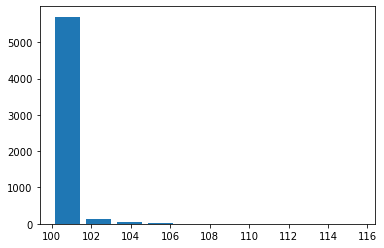

In [27]:
plt.hist(df10.price_per_sqmt,rwidth=0.8)
plt.show()

In [28]:
df10['price_per_sqmt2']=df10['price_per_sqmt']**2
df10.head(2)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,numPrevOwners,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,price_per_sqmt,price_per_sqmt2
0,75523,3,0,1,63,8,0,1,4313,9005,956,0,7,7559081.5,Basic,100.089794,10017.966830
1,80771,39,1,1,98,6,1,0,3653,2436,128,1,2,8085989.5,Luxury,100.110058,10022.023726


In [29]:
Q1=df10.price_per_sqmt2.quantile(0.25)
Q3=df10.price_per_sqmt2.quantile(0.75)
IQR=Q3-Q1
ll9=Q1-IQR*1.5
ul9=Q3+IQR*1.5
df10[(df10.price_per_sqmt2<=ll9) | (df10.price_per_sqmt2>=ul9)]
df11=df10[(df10.price_per_sqmt2>ll9) & (df10.price_per_sqmt2<ul9)]
df11.shape

(5200, 17)

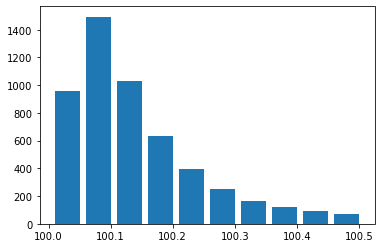

In [30]:
plt.hist(df11.price_per_sqmt,rwidth=0.8)
plt.show()

In [31]:
#now my distribution is kinda of a normal distribution which is pretty good

In [32]:
df12=df11.drop(['price_per_sqmt','price_per_sqmt2'],axis='columns')
df12.head(4)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,numPrevOwners,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,8,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,6,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,8,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,4,0,1,659,7141,359,0,3,3232561.2,Basic


In [33]:
df12.dtypes

squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
numPrevOwners          int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
category              object
dtype: object

In [34]:
#converting the category column into a numerical data using the replace function
df12.category.unique()              

array(['Basic', 'Luxury'], dtype=object)

In [35]:
df12.category=df12.category.replace(['Basic', 'Luxury'],[0,1])
df12.sample(5)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,numPrevOwners,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
3302,23614,53,1,0,90,4,1,1,1199,5240,671,0,8,2368476.0,0
6453,75402,73,1,0,21,2,0,0,3045,903,446,1,4,7545890.2,0
5315,80823,23,0,1,31,9,1,0,1180,951,307,1,6,8088333.4,0
2235,68862,78,1,0,12,9,0,1,3064,5202,962,0,9,6891082.7,0
9759,97199,78,0,1,42,9,1,0,4072,7938,456,0,1,9725164.7,0


In [36]:
#preparing my data for training and testing
df12.shape

(5200, 15)

In [37]:
df12.price.unique()

array([7559081.5, 8085989.5, 5574642.1, ..., 9623811.5, 3361070.6,
       5905107. ])

In [38]:

df12['price']=pd.to_numeric(df12['price'],errors='coerce').astype('int64')

In [39]:
df12.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,numPrevOwners,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,8,0,1,4313,9005,956,0,7,7559081,0
1,80771,39,1,1,98,6,1,0,3653,2436,128,1,2,8085989,1
2,55712,58,0,1,19,8,0,0,2937,8852,135,1,9,5574642,0
3,32316,47,0,0,6,4,0,1,659,7141,359,0,3,3232561,0
4,70429,19,1,1,90,7,1,0,8435,2429,292,1,4,7055052,1


In [40]:
df12.dtypes

squareMeters         int64
numberOfRooms        int64
hasYard              int64
hasPool              int64
floors               int64
numPrevOwners        int64
isNewBuilt           int64
hasStormProtector    int64
basement             int64
attic                int64
garage               int64
hasStorageRoom       int64
hasGuestRoom         int64
price                int64
category             int64
dtype: object

In [41]:
X=df12.drop('price',axis='columns')
X.shape

(5200, 14)

In [42]:
y=df12.price
y.head(4)

0    7559081
1    8085989
2    5574642
3    3232561
Name: price, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [ ]:
len(X_train)

In [ ]:
y.dtypes

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [48]:
##creating a machine learning model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [49]:
#cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
def find_best_model_using_gridsearchcv(X,y):
    models={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        'svm':{
            'model':SVC(),
            'params':{
                'C':[1,2,3],
                'kernel':['linear','rbf']
            }
        },
        'random_forest':{
            'model':RandomForestClassifier(),
            'params':{
                
            }
        },
        'logistic_regression':{
            'model':LogisticRegression(),
            'params':{}
        }
    }
#this is what we call hyper parameter tunning

    my_scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name,config in models.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        my_scores.append({
            'model':model_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(my_scores,columns=['model','best_score','best_params'])


In [50]:
#find_best_model_using_gridsearchcv(X_train,y_train)

In [51]:
#we can use cross_val_score to help get the better algorithm to train our model

In [52]:
cross_val_score(LinearRegression(),X_train,y_train)

array([0.99999936, 0.99999944, 0.99999941, 0.99999946, 0.99999944])

In [53]:
cross_val_score(DecisionTreeRegressor(),X_train,y_train)

array([0.99998965, 0.99997501, 0.99999141, 0.99999044, 0.99999103])

In [54]:
cross_val_score(Lasso(),X_train,y_train)

array([0.99999936, 0.99999944, 0.99999941, 0.99999946, 0.99999944])

In [55]:
#i am gonna use Lasso to train my model

In [56]:
model=Lasso()
model.fit(X_train,y_train)

Lasso()

In [57]:
model.score(X_test,y_test)

0.9999994358026761

In [ ]:
y_predicted=model.predict(X_test)
y_predicted[:10]
y_predicted=np.round(y_predicted,0)
y_pred=pd.to_numeric(y_predicted).astype('int64')
y_pred[:10]

In [ ]:
y_test.dtypes

In [ ]:
y_test[:10]

In [ ]:
#next i will create a heatmap for a better visualization of the predicted results
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
cm=confusion_matrix(y_test,y_pred)
cm

In [ ]:
plt.figure(figsize=(20,10))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [ ]:
#my model is doing pretty good on doing the predictions
#next i can print a classification report
print('Classification Report: \n',classification_report(y_test,y_pred))